**Alumno:** César Emilio García Ávalos

**Actividad:** M4_AG1_Análisis Clustering

In [170]:
require(factoextra)
library(tidyverse)
library(dplyr)
ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/4.4_Cluster_ejercicio.csv"
df <- read.csv(ruta, sep = ",")
summary(df)

    State           PercentSmallBiz  PercentEmplySmallBiz AvgEmPerSmallBiz
 Length:51          Min.   :0.9817   Min.   :0.4200       Min.   :1.300   
 Class :character   1st Qu.:0.9914   1st Qu.:0.4622       1st Qu.:1.900   
 Mode  :character   Median :0.9937   Median :0.4861       Median :2.100   
                    Mean   :0.9931   Mean   :0.4961       Mean   :2.118   
                    3rd Qu.:0.9951   3rd Qu.:0.5190       3rd Qu.:2.300   
                    Max.   :0.9985   Max.   :0.6524       Max.   :3.300   
 MedIncomeSelfEmpCorp MedIncomeSelfEmpUnincorp PercentExportSmallBiz
 Min.   :39474        Min.   :18772            Min.   :0.7100       
 1st Qu.:45238        1st Qu.:21367            1st Qu.:0.8260       
 Median :48941        Median :22573            Median :0.8500       
 Mean   :49162        Mean   :24030            Mean   :0.8483       
 3rd Qu.:51421        3rd Qu.:25530            3rd Qu.:0.8820       
 Max.   :66500        Max.   :36377            Max.   :0.9570

In [171]:
head(df)

,State,PercentSmallBiz,PercentEmplySmallBiz,AvgEmPerSmallBiz,MedIncomeSelfEmpCorp,MedIncomeSelfEmpUnincorp,PercentExportSmallBiz,PercentExportValue,StateGDPGrowth,StateUnemployRate,ShareManufactEmploy,AvgEmpPerWOB,AvgEmpPerVOB,AvgEmpPerMOB,ShareProSvcEmploy,GrowthNumPropiertors
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Alabama,0.9936905,0.4746900,2.0,48941,20760,0.804,0.155,0.03,0.04,0.34,11.8,10.7,9.5,0.62,0.02
2,Alaska,0.9912795,0.5315244,2.0,60559,30817,0.710,0.384,0.02,0.07,0.35,5.6,6.5,6.4,0.59,0.01
3,Arizona,0.9942976,0.4449635,1.8,48698,20872,0.874,0.231,0.03,0.05,0.46,8.3,11.5,9.4,0.56,0.03
4,Arkansas,0.9927139,0.4782382,1.9,45044,21128,0.781,0.283,0.02,0.04,0.26,8.2,7.8,7.7,0.71,0.02
5,California,0.9984648,0.4883776,1.8,57420,25034,0.957,0.432,0.03,0.04,0.53,7.9,10.1,8.5,0.55,0.03
6,Colorado,0.9946615,0.4861072,1.8,49977,24631,0.875,0.306,0.04,0.03,0.52,6.1,8.6,7.6,0.57,0.02


In [172]:
# Reemplazo de "*" por NA
df[df == "*"] <- NA

# Convertir las variables a num
df[, c("AvgEmpPerWOB", "AvgEmpPerVOB", "AvgEmpPerMOB", "ShareProSvcEmploy")] <- lapply(df[, c("AvgEmpPerWOB", "AvgEmpPerVOB", "AvgEmpPerMOB", "ShareProSvcEmploy")], as.numeric)

# Imputar valores faltantes con la mediana
df <- df %>% mutate(across(c(AvgEmpPerWOB, AvgEmpPerVOB, AvgEmpPerMOB, ShareProSvcEmploy), ~replace_na(., median(., na.rm=TRUE))))

# Mostrar columnas que contienen NA
colSums(is.na(df))

State          PercentSmallBiz     PercentEmplySmallBiz 
                       0                        0                        0 
        AvgEmPerSmallBiz     MedIncomeSelfEmpCorp MedIncomeSelfEmpUnincorp 
                       0                        0                        0 
   PercentExportSmallBiz       PercentExportValue           StateGDPGrowth 
                       0                        0                        0 
       StateUnemployRate      ShareManufactEmploy             AvgEmpPerWOB 
                       0                        0                        0 
            AvgEmpPerVOB             AvgEmpPerMOB        ShareProSvcEmploy 
                       0                        0                        0 
    GrowthNumPropiertors 
                       0

In [173]:
head(df)

,State,PercentSmallBiz,PercentEmplySmallBiz,AvgEmPerSmallBiz,MedIncomeSelfEmpCorp,MedIncomeSelfEmpUnincorp,PercentExportSmallBiz,PercentExportValue,StateGDPGrowth,StateUnemployRate,ShareManufactEmploy,AvgEmpPerWOB,AvgEmpPerVOB,AvgEmpPerMOB,ShareProSvcEmploy,GrowthNumPropiertors
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,0.9936905,0.4746900,2.0,48941,20760,0.804,0.155,0.03,0.04,0.34,11.8,10.7,9.5,0.62,0.02
2,Alaska,0.9912795,0.5315244,2.0,60559,30817,0.710,0.384,0.02,0.07,0.35,5.6,6.5,6.4,0.59,0.01
3,Arizona,0.9942976,0.4449635,1.8,48698,20872,0.874,0.231,0.03,0.05,0.46,8.3,11.5,9.4,0.56,0.03
4,Arkansas,0.9927139,0.4782382,1.9,45044,21128,0.781,0.283,0.02,0.04,0.26,8.2,7.8,7.7,0.71,0.02
5,California,0.9984648,0.4883776,1.8,57420,25034,0.957,0.432,0.03,0.04,0.53,7.9,10.1,8.5,0.55,0.03
6,Colorado,0.9946615,0.4861072,1.8,49977,24631,0.875,0.306,0.04,0.03,0.52,6.1,8.6,7.6,0.57,0.02


In [174]:
# Agregar State a los nombres de las filas del dataframe
df_copy <- as.data.frame(df)
rownames(df_copy) <- df_copy$State
df_copy <- df_copy[,2:16]

# Escalar las variables numéricas
df_copy <- scale(df_copy)

# Mostrar el summary
summary(df_copy)

 PercentSmallBiz   PercentEmplySmallBiz AvgEmPerSmallBiz   MedIncomeSelfEmpCorp
 Min.   :-3.3817   Min.   :-1.4818      Min.   :-2.45769   Min.   :-1.67544    
 1st Qu.:-0.4950   1st Qu.:-0.6590      1st Qu.:-0.65421   1st Qu.:-0.67866    
 Median : 0.1872   Median :-0.1937      Median :-0.05304   Median :-0.03815    
 Mean   : 0.0000   Mean   : 0.0000      Mean   : 0.00000   Mean   : 0.00000    
 3rd Qu.: 0.6152   3rd Qu.: 0.4474      3rd Qu.: 0.54812   3rd Qu.: 0.39076    
 Max.   : 1.6142   Max.   : 3.0440      Max.   : 3.55392   Max.   : 2.99864    
 MedIncomeSelfEmpUnincorp PercentExportSmallBiz PercentExportValue
 Min.   :-1.3557          Min.   :-2.59676      Min.   :-1.5062   
 1st Qu.:-0.6866          1st Qu.:-0.41868      1st Qu.:-0.6043   
 Median :-0.3756          Median : 0.03196      Median :-0.3036   
 Mean   : 0.0000          Mean   : 0.00000      Mean   : 0.0000   
 3rd Qu.: 0.3869          3rd Qu.: 0.63281      3rd Qu.: 0.3073   
 Max.   : 3.1839          Max.   : 2.0

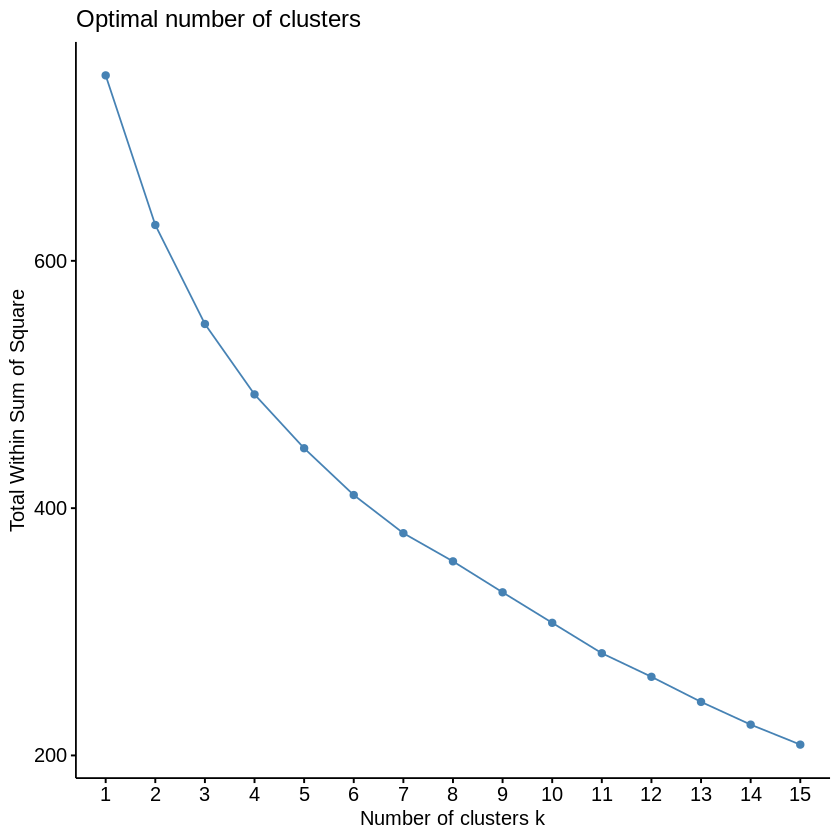

In [175]:
# Visualización del método de codo
fviz_nbclust(x = df_copy, FUNcluster = kmeans, method = "wss", k.max = 15,
             diss = get_dist(df_copy, method = "euclidean"), nstart = 50)

Visualizando el gráfico no se identifica un codo bien formado donde la suma total de cuadrados internos parezca estabilizarse, sin embargo una reducción puede visualizarse a partir de k= 3 o k= 4

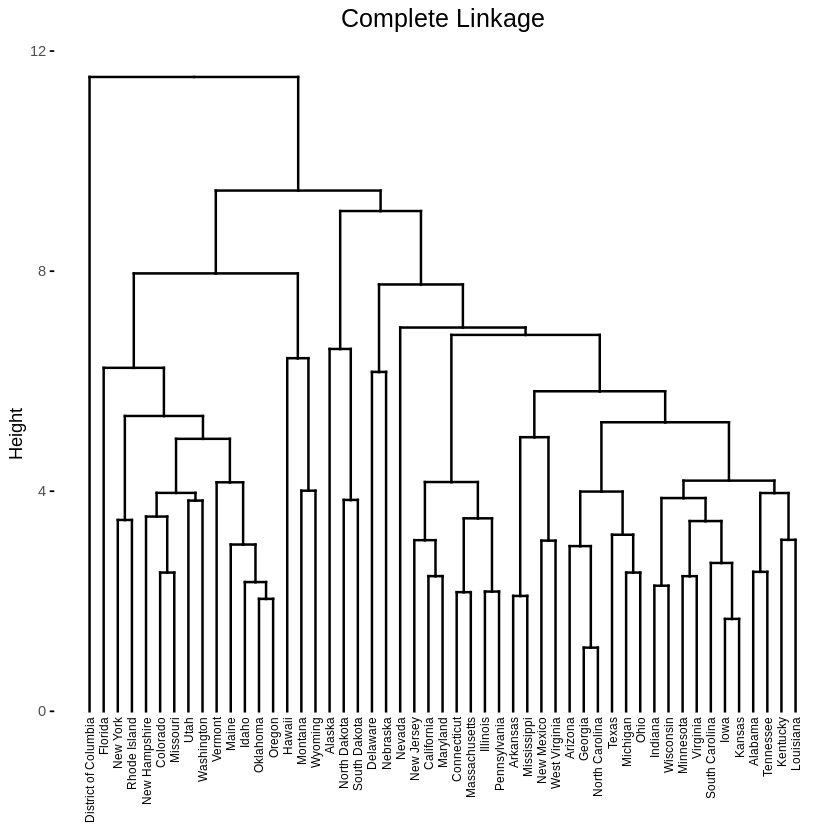

In [176]:
# Dendrogram visualization
set.seed(12345)
hc_complete <- hclust(d = dist(x = df_copy, method = "euclidean"),
                      method = "complete")

fviz_dend(x = hc_complete, cex = 0.5, main = "Complete Linkage",
          sub = "Euclidean Distance") +
  theme(plot.title = element_text(hjust = 0.5, size = 15))

Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple of replacement length”
Warning message in sil[k] <- silhouette(km_clusters$cluster, dist(df_copy)):
“number of items to replace is not a multiple o

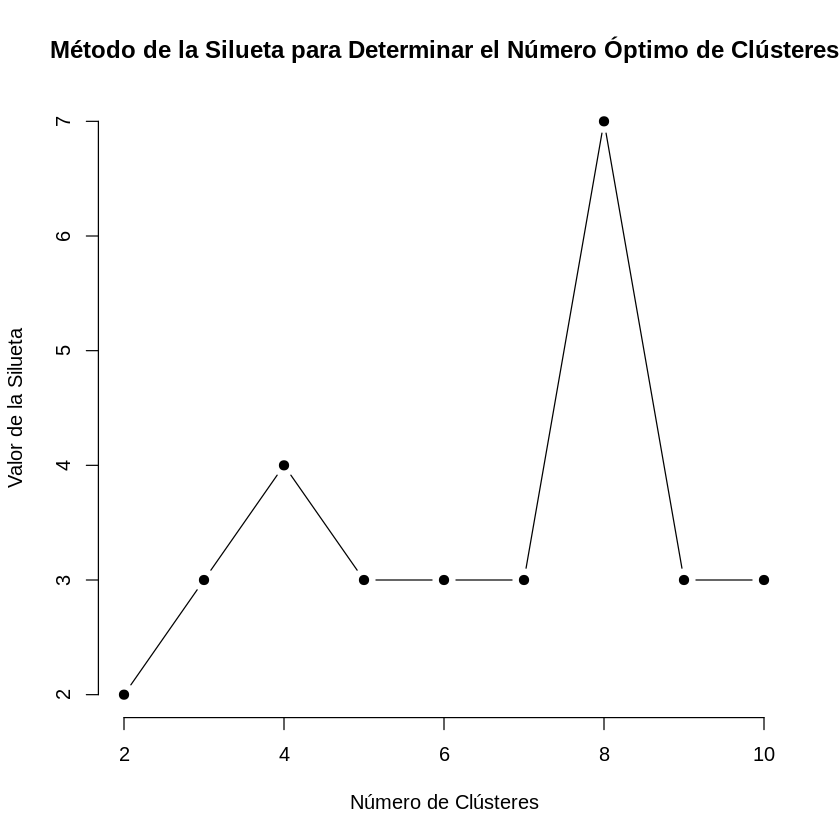

In [177]:
# Calcular las métricas de silueta para diferentes números de clústeres
sil <- c(NA)  # Inicializar el vector de siluetas
for (k in 2:10) {
  km_clusters <- kmeans(df_copy, centers = k)
  sil[k] <- silhouette(km_clusters$cluster, dist(df_copy))
}

# Graficar las métricas de silueta
plot(2:10, sil[2:10], type = "b", pch = 19, frame = FALSE,
     xlab = "Número de Clústeres", ylab = "Valor de la Silueta",
     main = "Método de la Silueta para Determinar el Número Óptimo de Clústeres")

El dendograma muestra que al menos son necesarios 3 clusters, el distrito de Columbia difiere significativamente del resto de los estados pues está asignado en un cluster separado del resto, se tomará un valor de k= 4 para el análisis posterior tomando en cuenta el método de la silueta (también se observa que 8 es número óptimo de clusters pero por facilidad de interpretación se utilizará 4, de igual manera, al visualizar los clusters se identifica que 4 puede ser un número adecuado) se infiere que 4 clusters explican la naturaleza subyacente y los patrones de los datos

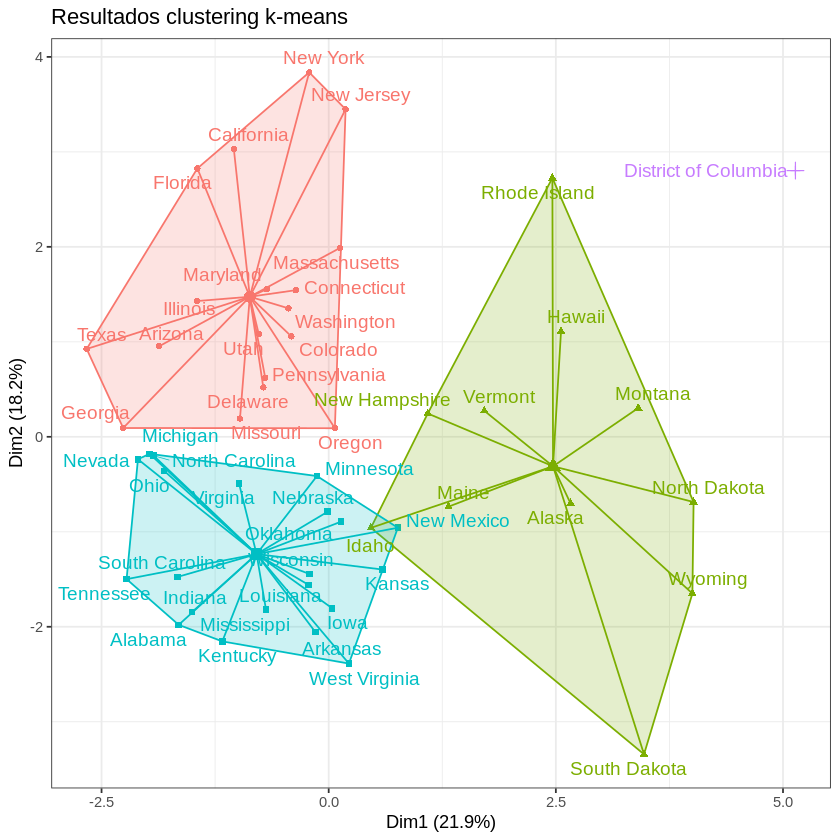

In [178]:
# Creacion de los clusters
set.seed(12345)
km_clusters <- kmeans(x = df_copy, centers = 4, nstart = 50)

# Visualización de los clusters
fviz_cluster(object = km_clusters, data = df_copy, show.clust.cent = TRUE,
             elipse.type = "euclid", star.plot = TRUE, repel = TRUE) +
  labs(title = "Resultados clustering k-means") +
  theme_bw() +
  theme(legend.position = "none")

In [179]:
# Calcular distancia de cada estado a su centroide
distances <- sqrt(rowSums((df_copy - fitted(km_clusters))^ 2))
distance <- as.data.frame(distances)

# Crear una clasificación de cada estado con su cluster
cluster_assign <-  as.data.frame(km_clusters[1])

# Crear la variable de estado en el dataframe con estados agrupados por clúster y distancias
cluster_assign <- rownames_to_column(cluster_assign, var = "State")
distance <- rownames_to_column(distance, var = "State")

# Combinando los dos dataframes
distance <- inner_join(distance, cluster_assign, by = "State")

# Verificar estado de cada clúster con la menor distancia a su centroide
distance %>% select("State", "distances", "cluster") %>% arrange(cluster, distances) %>%
  group_by(cluster) %>%
  slice(1)

State,distances,cluster
<chr>,<dbl>,<int>
Illinois,1.615089,1
Maine,2.430999,2
South Carolina,1.677608,3
District of Columbia,0.000000,4


Los estados más representativos han sido escogidos con base a la cercanía de las distancias respecto al centroide del cluster al cual pertenecen, Illinois, Maine, Carolina del Sur y el Distrito de Columbia son los estados más representativos de los clusters 1, 2, 3 y 4 respectivamente pues se encuentran más cerca de su centroide

In [180]:
# Selección de estados a incluir en el vector
states <- c("Illinois", "Maine", "South Carolina", "District of Columbia")

# Crear nuevo df con los estados seleccionados
df_select <- subset(df, rownames(df_copy) %in% states)
df_select_stand <- subset(df_copy, rownames(df_copy) %in% states)
df_select_stand <- as.data.frame(df_select_stand)

# Crear dataframe con los rangos de las variables
df_diff <- data.frame(apply(df_select_stand, 2, function(x) max(x) - min(x)))
df_diff %>% arrange(desc(apply.df_select_stand..2..function.x..max.x....min.x..))

,apply.df_select_stand..2..function.x..max.x....min.x..
,<dbl>
PercentExportValue,4.4739257
PercentSmallBiz,4.3093460
MedIncomeSelfEmpCorp,4.2508722
AvgEmPerSmallBiz,4.2081271
ShareManufactEmploy,3.7374973
MedIncomeSelfEmpUnincorp,3.4718593
ShareProSvcEmploy,3.0171961
StateUnemployRate,2.9778938
PercentExportSmallBiz,2.4221785


Las variables que tienen mayor rango o difieren entre los estados en mayor medida son PercentExportValue, PercentSmallBiz, MedIncomeSelfEmpCorp y AvgEmPerSmallBiz

In [181]:
# df de las tasas de desempleo por estado
df_select %>% select(State, StateUnemployRate)

,State,StateUnemployRate
,<chr>,<dbl>
9,District of Columbia,0.06
14,Illinois,0.05
20,Maine,0.03
41,South Carolina,0.04


De los estados más representativos por cluster, el estado con mayor tasa de desempleo es el Distrito de Columbia

In [182]:
# Agregar la columna 'cluster' al dataframe 'df'
df <- df %>%
  left_join(cluster_assign, by = "State")

In [183]:
# Calcular la mediana de PercentExportValue para cada clúster
df_summary <- df %>%
  group_by(cluster) %>%
  summarize(median_PercentExportValue = median(PercentExportValue, na.rm = TRUE))

# Encontrar el clúster con la mediana más baja de PercentExportValue
cluster_menos_exportaciones <- df_summary %>%
  filter(median_PercentExportValue == min(median_PercentExportValue)) %>%
  pull(cluster)

paste("El cluster con menos exportaciones es: ", cluster_menos_exportaciones)

[1] "El cluster con menos exportaciones es:  3"

In [184]:
# Identificar el estado más representativo de este clúster
estado_mas_representativo <- df %>%
  filter(cluster == cluster_menos_exportaciones) %>%
  arrange(PercentExportValue) %>%
  slice(1) %>%
  pull(State)

# Imprimir el estado más representativo del clúster con las exportaciones más bajas
paste("El estado más representativo del cluster 3 es: ",estado_mas_representativo)

[1] "El estado más representativo del cluster 3 es:  South Carolina"

Propondría trabajar con el cluster 3, es el que tiene la mediana más baja en cuanto a porcentaje de exportaciones de los 4 clusters, el estado más representativo del cluster 3 es Carolina del Sur

In [185]:
# Calcular la mediana de PercentExportValue para cada clúster
df_summary <- df %>%
  group_by(cluster) %>%
  summarize(median_PercentExportValue = median(PercentExportValue, na.rm = TRUE))

# Encontrar el clúster con la mediana de PercentExportValue más alta
cluster_mas_ingresos <- df_summary %>%
  filter(median_PercentExportValue == max(median_PercentExportValue)) %>%
  pull(cluster)

# Imprimir el clúster con la mediana de PercentExportValue más alta
paste("El Cluster con mas ingresos es:",cluster_mas_ingresos)

[1] "El Cluster con mas ingresos es: 4"

In [186]:
df %>% select(State, cluster, PercentExportValue) %>% arrange(desc(PercentExportValue)) %>% slice(1)

State,cluster,PercentExportValue
<chr>,<int>,<dbl>
District of Columbia,4,0.795


El cluster que representa mejor a los negocios pequeños con más ingresos es el cluster 4 conformado únicamente por el Distrito de Columbia, dicho estado, es el que tiene el mayor porcentaje de exportaciones